In [42]:
# Imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [43]:
# Reading in the data

(data, target) = load_wine(return_X_y=True, as_frame=True)

In [44]:
data.shape

(178, 13)

In [45]:
data.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


## Splitting data into train and test

In [46]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=.4, random_state=0)
print(f"Train size: {X_train.shape[0]}")
print(f"Test size: {X_test.shape[0]}")

Train size: 106
Test size: 72


## Scaling the Train Data
Subtracting the mean (NOT scaling) is the same as centering the data.

In [47]:
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [48]:
X_train_scaled.shape

(106, 13)

## Base Model

Model with all the parameters

In [49]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(multi_class="multinomial")
lr.fit(X_train_scaled, y_train)

LogisticRegression(multi_class='multinomial')

In [50]:
lr.score(X_train_scaled, y_train)

1.0

In [51]:
lr.score(X_test_scaled, y_test) 

0.9861111111111112

## Principal Component Analysis

### Calculating PCA Manually

#### 1. Find the Covariance Matrix

\begin{equation} Cov(A, B) = E[(A - E(A))(B - E(B))] \end{equation}
* if the random variables have mean of 0, their covariance coincides with their linear correlation, $E[A,B]$


In [52]:
covariance_matrix = np.cov(X_train_scaled.T)

In [53]:
covariance_matrix.shape

(13, 13)

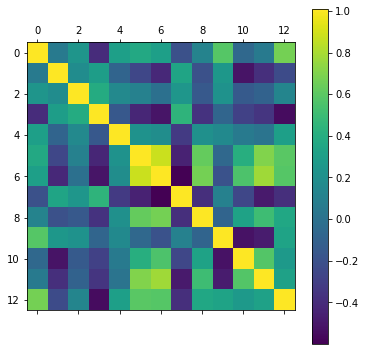

In [54]:
# Plotting the covariance matrix

fig = plt.figure(figsize=(6, 6));
plt.matshow(covariance_matrix, fignum=fig.number)
plt.colorbar();

#### 2. Calculate the Eigenvalues and Eigenvectors

What are eigenvalues and eigenvectors? Geometrically, what do they represent?

In [55]:
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

In [56]:
eigenvalues

array([4.98980631, 2.52281116, 1.30729531, 0.95979311, 0.89529187,
       0.59340132, 0.55760541, 0.08052993, 0.15931686, 0.32917132,
       0.28369969, 0.23448391, 0.21060332])

In [57]:
eigenvectors.shape

(13, 13)

In [58]:
eigenvectors[0]

array([-0.16851196, -0.50465504, -0.03004768,  0.07412952, -0.2102775 ,
       -0.13437712, -0.19998605, -0.07847688, -0.32406072, -0.13023001,
        0.49096678,  0.44493496,  0.20275943])

#### 3. Calculating the Explained Variance

In [59]:
explained_variances = []
for i in range(len(eigenvalues)):
    explained_variances.append(eigenvalues[i] / np.sum(eigenvalues))

print(explained_variances)

[0.38021020522122145, 0.19223161960219926, 0.09961248711740545, 0.07313372777499721, 0.06821890181402214, 0.0452156302109096, 0.04248807574622965, 0.006136170101734636, 0.0121395285657996, 0.025081994682070355, 0.021617175173485857, 0.01786706124671664, 0.01604742274320817]


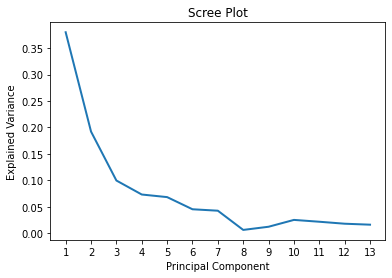

In [60]:
# Plotting the PC and its respective explained variance

plt.plot(np.arange(len(eigenvalues))+1, explained_variances, linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.xticks(np.arange(len(eigenvalues))+1)
plt.ylabel('Explained Variance') 
plt.show() 

### Implementing PCA from Scikit-Learn

In [61]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_train_scaled)

PCA()

In [62]:
pca.explained_variance_ratio_

array([0.38021021, 0.19223162, 0.09961249, 0.07313373, 0.0682189 ,
       0.04521563, 0.04248808, 0.02508199, 0.02161718, 0.01786706,
       0.01604742, 0.01213953, 0.00613617])

In [68]:
# Using PCA to get 60% of the explained variance

pca = PCA(n_components=.6)
pca_train = pca.fit_transform(X_train_scaled)
pca_test = pca.transform(X_test_scaled)

In [71]:
pca_train.shape

(106, 3)

In [69]:
# Applying Logisitic Regression on the PCA data

lr = LogisticRegression(multi_class="multinomial")
lr.fit(pca_train, y_train)
lr.score(pca_train, y_train)

0.9905660377358491

In [70]:
lr.score(pca_test, y_test)

0.9722222222222222